### Logistic Regression

Binary classification

Multi class classification

Why can't we use Linear regression for a classification problem? 

let's see

y_pred = m*x + c

##### Reason1

In Binary classification, output will either be 0 or 1

0 <= y_pred <=1

But in linear regression, it can go beyond that

y_pred < 0 or y_pred > 1

##### Reason2

The best fit line keeps changing if there is any outlier

Which will classify the data incorrectly

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
np.random.seed(69)
weights = np.random.randint(50,101,size=15)
obese = (weights>75).astype(int)

In [70]:
weights

array([61, 59, 93, 76, 70, 99, 72, 59, 83, 88, 82, 74, 62, 87, 92])

In [71]:
obese

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [72]:
df = pd.DataFrame({"weight":weights,"obese":obese})

In [73]:
df.head()

,weight,obese
0,61,0
1,59,0
2,93,1
3,76,1
4,70,0


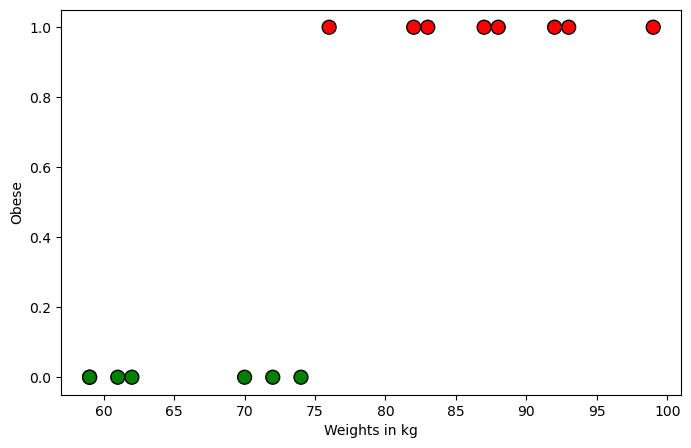

In [74]:
plt.figure(figsize=(8,5))
plt.scatter(df["weight"],df["obese"],color=['red' if x else 'green' for x in df["obese"]],s=100,edgecolors='black')
plt.xlabel("Weights in kg")
plt.ylabel("Obese")
plt.show()

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
model = LinearRegression()

In [77]:
weights.shape

(15,)

In [78]:
obese.shape

(15,)

In [79]:
weights = weights.reshape(-1,1)

In [80]:
weights.shape

(15, 1)

In [81]:
obese = obese.ravel()

In [82]:
obese

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [83]:
obese.shape

(15,)

In [84]:
model.fit(weights, obese)

LinearRegression()

In [85]:
model.coef_

array([0.03371639])

In [86]:
model.intercept_

-2.067324371205551

In [87]:
m = model.coef_[0]
c = model.intercept_

In [88]:
print(m,c)

0.033716392020815264 -2.067324371205551


In [89]:
weights_range = np.linspace(50,100,100).reshape(-1,1)

In [90]:
len(weights_range)

100

In [91]:
obese_preds = model.predict(weights_range)

In [92]:
len(obese_preds)

100

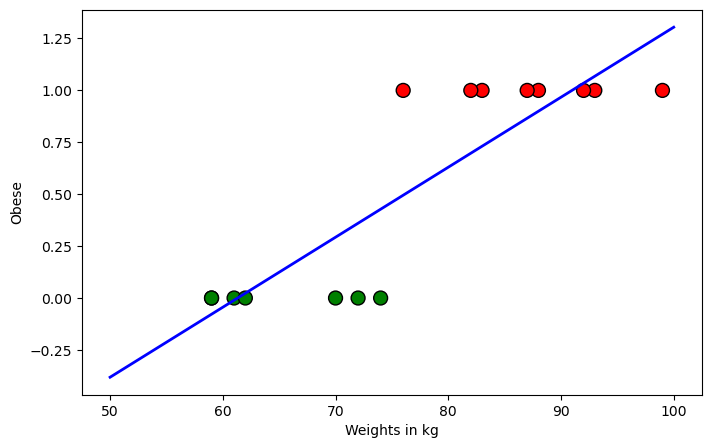

In [93]:
plt.figure(figsize=(8,5))
plt.scatter(df["weight"],df["obese"],color=['red' if x else 'green' for x in df["obese"]],s=100,edgecolors='black')
plt.xlabel("Weights in kg")
plt.ylabel("Obese")
plt.plot(weights_range, obese_preds, color="blue", linewidth=2, label="Best fit line")
plt.show()

Consider threshold as 0.5

If we use linear regression, and assume that if y_pred >= 0.5 => Obese

Else if y_pred < 0.5 => Not Obese

In [94]:
weight_at_0_5 = (0.5 - c) / m
weight_at_0_5

76.14469453376206

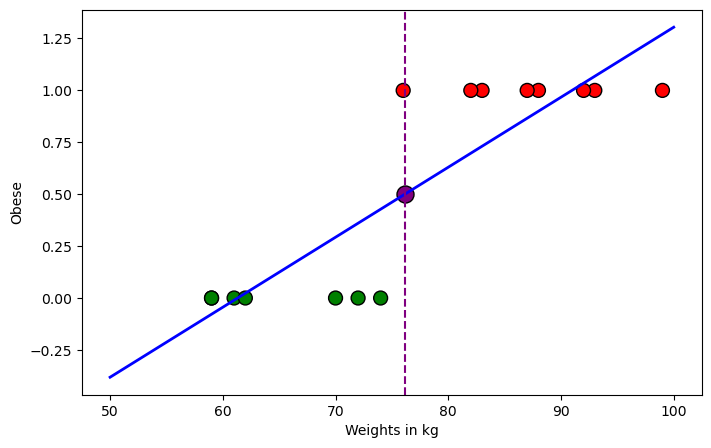

In [95]:
plt.figure(figsize=(8,5))
plt.scatter(df["weight"],df["obese"],color=['red' if x else 'green' for x in df["obese"]],s=100,edgecolors='black')
plt.xlabel("Weights in kg")
plt.ylabel("Obese")
plt.plot(weights_range, obese_preds, color="blue", linewidth=2, label="Best fit line")
plt.axvline(weight_at_0_5, color='purple', linestyle='dashed')
plt.scatter(weight_at_0_5, 0.5, color='purple', s=150, edgecolors='black', label='Threshold point')
plt.show()

In [96]:
print(f"Weight at which obesity classification is 0.5: {weight_at_0_5:.2f} kg")

Weight at which obesity classification is 0.5: 76.14 kg


##### Now let's say there is an outlier in our data

In [97]:
outlier_data = {"weight": 115, "obese": 1}

In [98]:
len(df)

15

In [99]:
df.tail()

,weight,obese
10,82,1
11,74,0
12,62,0
13,87,1
14,92,1


In [100]:
df.loc[len(df)] = outlier_data
df.tail()

,weight,obese
11,74,0
12,62,0
13,87,1
14,92,1
15,115,1


In [101]:
df.shape

(16, 2)

In [106]:
new_weights = np.array(df["weight"]).reshape(-1,1)

In [107]:
model.fit(new_weights, np.array(df["obese"]))

LinearRegression()

In [114]:
model.coef_

array([0.02615668])

In [115]:
model.intercept_

-1.516955835962146

In [118]:
m = model.coef_[0]
c = model.intercept_

In [119]:
print(m,c)

0.026156677181913786 -1.516955835962146


In [108]:
new_weights_range = np.linspace(50,120,100).reshape(-1,1)
new_model_preds = model.predict(new_weights_range).ravel()

In [109]:
new_weights_range.shape

(100, 1)

In [110]:
new_model_preds.shape

(100,)

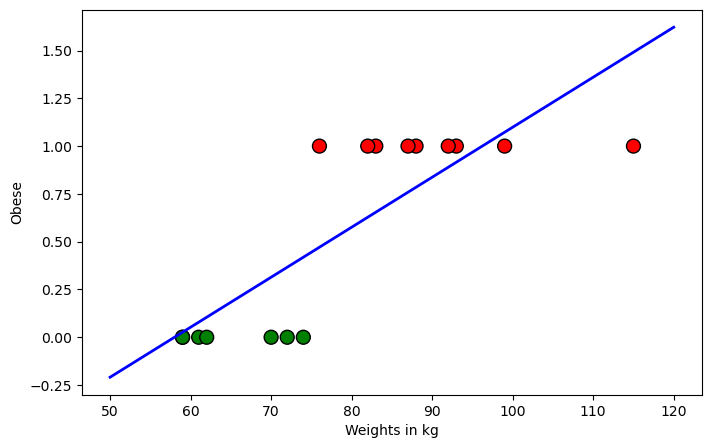

In [111]:
plt.figure(figsize=(8,5))
plt.scatter(df["weight"],df["obese"],color=['red' if x else 'green' for x in df["obese"]],s=100,edgecolors='black')
plt.xlabel("Weights in kg")
plt.ylabel("Obese")
plt.plot(new_weights_range, new_model_preds, color="blue", linewidth=2, label="Best fit line")
plt.show()

In [120]:
weight_at_0_5 = (0.5-c)/m
weight_at_0_5

77.1105527638191

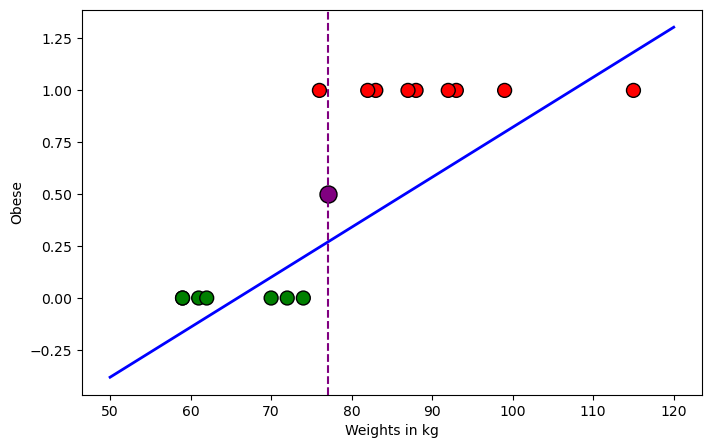

In [139]:
plt.figure(figsize=(8,5))
plt.scatter(df["weight"],df["obese"],color=['red' if x else 'green' for x in df["obese"]],s=100,edgecolors='black')
plt.xlabel("Weights in kg")
plt.ylabel("Obese")
plt.plot(new_weights_range, obese_preds, color="blue", linewidth=2, label="Best fit line")
plt.axvline(weight_at_0_5, color='purple', linestyle='dashed')
plt.scatter(weight_at_0_5, 0.5, color='purple', s=150, edgecolors='black', label='Threshold point')
plt.show()

In [122]:
print(f"Weight at which obesity classification is 0.5: {weight_at_0_5:.2f} kg")

Weight at which obesity classification is 0.5: 77.11 kg


As you can notice clearly from the above graph, the first red point is classified as **Not Obese** but actually it's an **Obese**

Since, it is less than 0.5 it is classified as not obese

Just because of one outlier, the classification got changed

Thus, we don't use linear regression for a classification problem

### Sigmoid function

##### P(y=1|x) = 1/(1+e^-(m*x + c))

For threshold / probability 0.5

0.5 = 1/(1+e^-z) where z = m*x + c

2 = 1 + e^-z

e^-z = 1

z = 0

m*x + c = 0

x = -c/m

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
model_log = LogisticRegression()

In [129]:
model_log.fit(new_weights, np.array(df["obese"]))

LogisticRegression()

In [130]:
model_log.coef_

array([[0.86253385]])

In [131]:
model_log.intercept_

array([-64.85165167])

In [135]:
m = model_log.coef_[0][0]
c = model_log.intercept_[0]

In [136]:
logistic_weight_at_0_5 = -c/m

In [137]:
logistic_weight_at_0_5

75.18736994971692

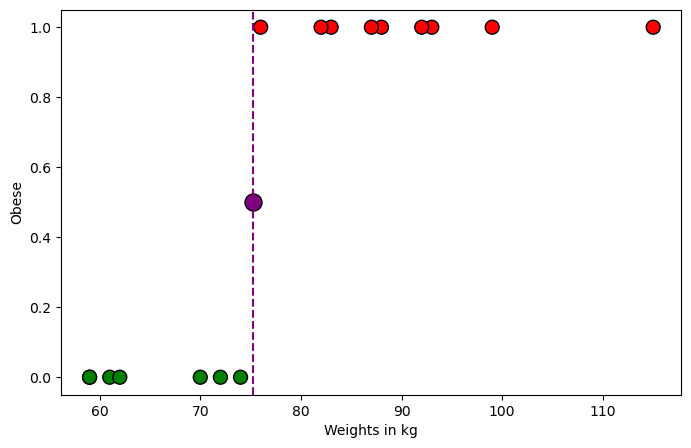

In [138]:
plt.figure(figsize=(8,5))
plt.scatter(df["weight"],df["obese"],color=['red' if x else 'green' for x in df["obese"]],s=100,edgecolors='black')
plt.xlabel("Weights in kg")
plt.ylabel("Obese")
plt.axvline(logistic_weight_at_0_5, color='purple', linestyle='dashed')
plt.scatter(logistic_weight_at_0_5, 0.5, color='purple', s=150, edgecolors='black', label='Threshold point')
plt.show()

##### Perfect

In [143]:
model_log.predict_proba(new_weights_range)

array([[1.00000000e+00, 3.67257024e-10],
       [9.99999999e-01, 6.75825131e-10],
       [9.99999999e-01, 1.24365111e-09],
       [9.99999998e-01, 2.28856256e-09],
       [9.99999996e-01, 4.21140506e-09],
       [9.99999992e-01, 7.74981329e-09],
       [9.99999986e-01, 1.42611801e-08],
       [9.99999974e-01, 2.62433749e-08],
       [9.99999952e-01, 4.82929684e-08],
       [9.99999911e-01, 8.88685531e-08],
       [9.99999836e-01, 1.63535598e-07],
       [9.99999699e-01, 3.00937612e-07],
       [9.99999446e-01, 5.53784233e-07],
       [9.99998981e-01, 1.01907139e-06],
       [9.99998125e-01, 1.87529012e-06],
       [9.99996549e-01, 3.45089708e-06],
       [9.99993650e-01, 6.35031070e-06],
       [9.99988314e-01, 1.16857579e-05],
       [9.99978496e-01, 2.15038809e-05],
       [9.99960429e-01, 3.95706538e-05],
       [9.99927185e-01, 7.28153620e-05],
       [9.99866014e-01, 1.33986385e-04],
       [9.99753466e-01, 2.46533538e-04],
       [9.99546424e-01, 4.53576229e-04],
       [9.991656

First column for not obese, second column for being obese

In [144]:
log_obese_preds = model_log.predict_proba(new_weights_range)[:,1]

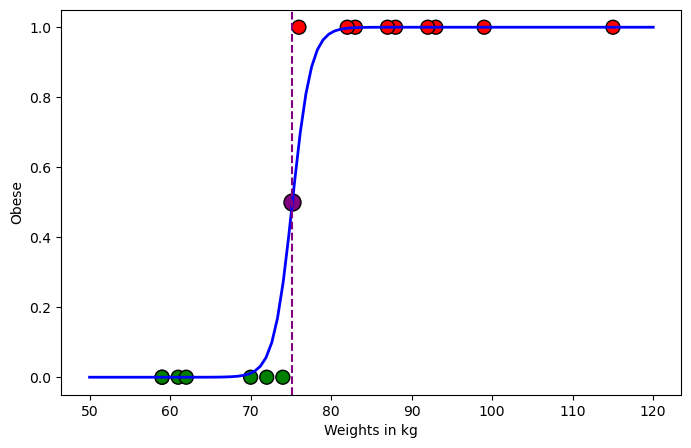

In [145]:
plt.figure(figsize=(8,5))
plt.scatter(df["weight"],df["obese"],color=['red' if x else 'green' for x in df["obese"]],s=100,edgecolors='black')
plt.xlabel("Weights in kg")
plt.ylabel("Obese")
plt.plot(new_weights_range, log_obese_preds, color="blue", linewidth=2, label="Best fit line")
plt.axvline(logistic_weight_at_0_5, color='purple', linestyle='dashed')
plt.scatter(logistic_weight_at_0_5, 0.5, color='purple', s=150, edgecolors='black', label='Threshold point')
plt.show()

Dashed line is the decision boundary

Blue line is the sigmoid curve / logistic regression curve

### One vs Rest

Multi class classification i.e., more than 2 classes

In [2]:
np.random.seed(69)
n_samples = 20 #samples per class

### Independent Variables (No Correlation)

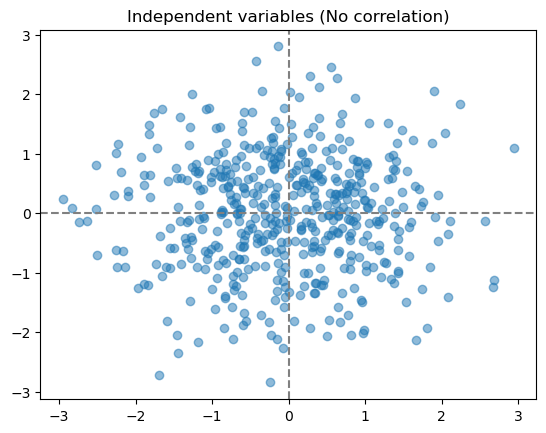

In [8]:
multivariate_data = np.random.multivariate_normal([0,0],[[1,0],[0,1]],500)
plt.scatter(multivariate_data[:,0], multivariate_data[:,1], alpha=0.5)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title("Independent variables (No correlation)")
plt.show()

### Dependent Variables

##### Positive Correlation

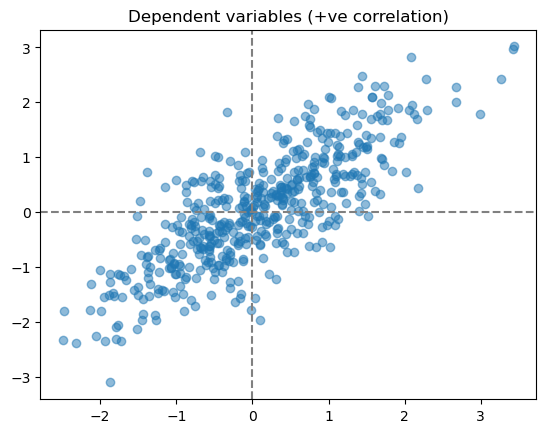

In [10]:
pos_data = np.random.multivariate_normal([0,0],[[1,0.8],[0.8,1]],500)
plt.scatter(pos_data[:,0], pos_data[:,1], alpha=0.5)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title("Dependent variables (+ve correlation)")
plt.show()

##### Negative Correlation

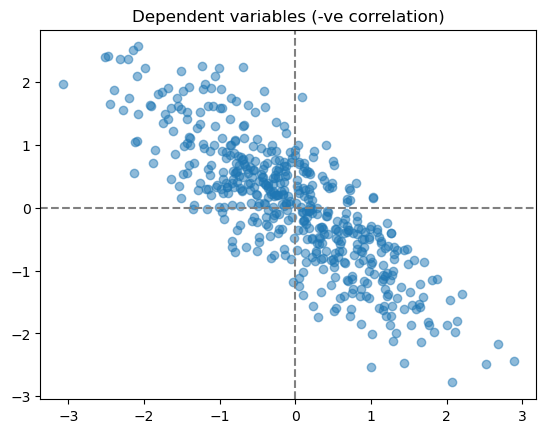

In [11]:
neg_data = np.random.multivariate_normal([0,0],[[1,-0.8],[-0.8,1]],500)
plt.scatter(neg_data[:,0], neg_data[:,1], alpha=0.5)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title("Dependent variables (-ve correlation)")
plt.show()

Now let's create the data for One vs Rest

In [12]:
mean_short = [150,50] # height, weight
mean_medium = [170,70] # height, weight
mean_large = [190, 90] # height, weight
cov = [[10,3],[3,10]]
short=np.random.multivariate_normal(mean_short,cov,n_samples)
medium=np.random.multivariate_normal(mean_medium,cov,n_samples)
large=np.random.multivariate_normal(mean_large,cov,n_samples)

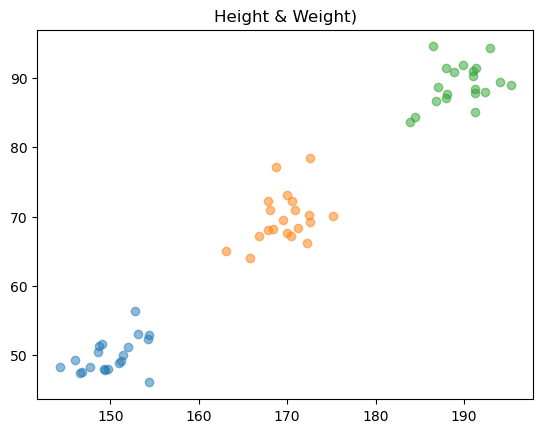

In [15]:
plt.scatter(short[:,0], short[:,1], alpha=0.5)
plt.scatter(medium[:,0], medium[:,1], alpha=0.5)
plt.scatter(large[:,0], large[:,1], alpha=0.5)
plt.title("Height & Weight)")
plt.show()

In [28]:
df_short = pd.DataFrame({"height":short[:,0], "weight":short[:,1], "category": "short"})
df_medium = pd.DataFrame({"height":medium[:,0], "weight":medium[:,1], "category": "medium"})
df_large = pd.DataFrame({"height":large[:,0], "weight":large[:,1], "category": "large"})
df = pd.concat([df_short, df_medium, df_large],ignore_index=True,axis=0)

In [30]:
df.head()

,height,weight,category
0,145.940269,49.205685,short
1,154.383597,46.020587,short
2,152.038055,51.188939,short
3,153.168618,52.966058,short
4,149.734180,47.995667,short


In [31]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [32]:
X.shape

(60, 2)

In [33]:
y.shape

(60,)

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [37]:
le = LabelEncoder()

In [38]:
le.fit_transform(y)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
y_encoded = le.fit_transform(y)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=69)

In [41]:
lr = LogisticRegression(solver="liblinear",multi_class="ovr")

In [42]:
lr.fit(X_train, y_train)

C:\Users\venka\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr', solver='liblinear')

In [43]:
y_pred = lr.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred)

0.8333333333333334

### Decision boundaries

In [64]:
height_min, height_max = X.iloc[:,0].min() - 5, X.iloc[:,0].max() + 5
weight_min, weight_max = X.iloc[:,1].min() - 5, X.iloc[:,1].max() + 5

In [77]:
height_min

139.29732478570853

In [78]:
height_max

200.31501909875448

In [79]:
weight_min

41.02058714528327

In [80]:
weight_max

99.57324192592748

In [65]:
xx, yy = np.meshgrid(np.linspace(height_min, height_max,50),np.linspace(weight_min,weight_max,50))

In [66]:
xx.shape

(50, 50)

In [67]:
yy.shape

(50, 50)

In [68]:
mesh_points=np.c_[xx.ravel(),yy.ravel()]
mesh_points

array([[139.29732479,  41.02058715],
       [140.54258385,  41.02058715],
       [141.78784292,  41.02058715],
       ...,
       [197.82450096,  99.57324193],
       [199.06976003,  99.57324193],
       [200.3150191 ,  99.57324193]])

In [92]:
pred_classes = lr.predict(mesh_points)

C:\Users\venka\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [93]:
pred_classes

array(['short', 'short', 'short', ..., 'large', 'large', 'large'],
      dtype=object)

In [94]:
pred_classes.shape

(2500,)

In [95]:
pred_classes = le.transform(pred_classes)

In [96]:
pred_classes=pred_classes.reshape(xx.shape)

In [97]:
pred_classes.shape

(50, 50)

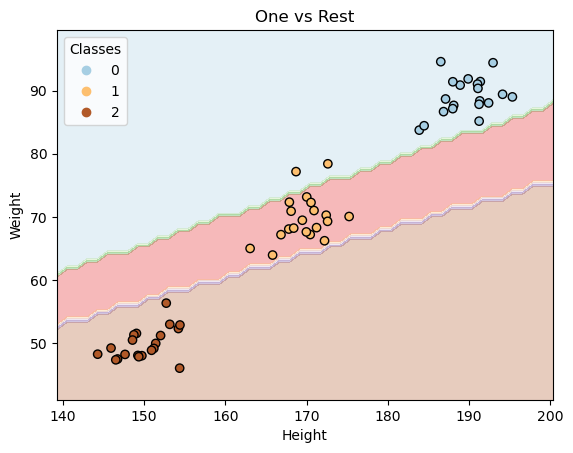

In [100]:
plt.contourf(xx, yy, pred_classes, alpha=0.3, cmap=plt.cm.Paired)
scatter = plt.scatter(X.iloc[:,0], X.iloc[:,1], c=y_encoded, cmap=plt.cm.Paired, edgecolors="k", marker="o")
plt.xlabel("Height")
plt.ylabel("Weight")

legend_labels = list(set(y_encoded))
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title="Classes")
plt.title("One vs Rest")
plt.show()